In [17]:
import sys, os
sys.path.append('/Users/michaelgentnermac/Documents/ADL4CV/video_interpolation/')
import torch
import torch.nn as nn
from backprojection.bfgs import BFGSProjector
from interpolate_latent.functions import *
from models.wgan import Generator, Discriminator
import torchvision.transforms as transforms
from backprojection.criticprojector import CriticProjector
import matplotlib.pyplot as plt

netG = torch.load('/Users/michaelgentnermac/Documents/ADL4CV/final_models/wgan/g.pt',map_location=torch.device('cpu'))
netG = netG.double().cpu()
netD = torch.load('/Users/michaelgentnermac/Documents/ADL4CV/final_models/wgan/d.pt', map_location=torch.device('cpu'))
netD = netD.double().cpu()
netP = torch.load('/Users/michaelgentnermac/Documents/ADL4CV/final_models/backprojection/pnet_64.pt', map_location=torch.device('cpu'))
netP = netP.double().cpu()

netG = netG.eval()
netD = netD.eval()
netP = netP.eval()

In [2]:
def create_train_valid_test_split(data):
    train_data_len = int(data.shape[1]*0.8)
    valid_data_len = int(data.shape[1]*0.1)
    test_data_len = int(data.shape[1]*0.1)
    train_data = data[:, 0:train_data_len, :, :]
    valid_data = data[:, train_data_len:(valid_data_len+train_data_len), :, :]
    test_data = data[:, (train_data_len+valid_data_len):(train_data_len+valid_data_len+test_data_len), :, :]
    return train_data, valid_data, test_data

In [3]:
def create_folder(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [4]:
data = np.load('/Users/michaelgentnermac/Documents/ADL4CV/mnist_test_seq_28.npy')
train_data, valid_data, test_data = create_train_valid_test_split(data)
toPil = transforms.ToPILImage()

In [37]:
num_images = 10

seq_length = test_data.shape[0]
num_seq = test_data.shape[1]

rand_imgs = np.random.randint(0, seq_length-1, num_images)
rand_seq = np.random.randint(0, num_seq-1, num_images)

In [38]:
folder_name = '479'
projector = BFGSProjector(netG, 16, device='cpu', method = 'L-BFGS-B', loss = nn.BCELoss(), tol = None)

In [39]:
#base_path = '/Users/michaelgentnermac/Documents/ADL4CV/results/Backprojection/'
#create_folder(os.path.join(base_path, folder_name))

pnetbfgs = []
for i in range(num_images):
    
    img = torch.tensor(test_data[rand_imgs[i], rand_seq[i], :, :]).double().unsqueeze(0)
    ##save original image
    #path = os.path.join(base_path, folder_name, 'original')
    #create_folder(path)
    #toPil(img.squeeze().float()).save(os.path.join(path, str(i)+'.png'), 'PNG')
   # 
    #save bfgs image
    #print("BFGS: Projecting image {}".format(i))
    #path = os.path.join(base_path, folder_name, 'bfgs')
    #create_folder(path)
    #z = torch.tensor(projector.project(img.squeeze()).x)
    #proj_img = netG(torch.tensor(z))
    #toPil(proj_img.detach().squeeze().float()).save(os.path.join(path, str(i)+'.png'), 'PNG')
    
    #save pnet image
    #print("PNET: Projecting image {}".format(i))
    #path = os.path.join(base_path, folder_name, 'pnet')
    #create_folder(path)
    #pnet_img = netG(netP(img))
    #toPil(pnet_img.detach().squeeze().float()).save(os.path.join(path, str(i)+'.png'), 'PNG')
    
    #save pnet+bfgs image
    print("PNET&BFGS: Projecting image {}".format(i))
    #path = os.path.join(base_path, folder_name, 'pnet_bfgs')
    #create_folder(path)
    z0 = netP(img).detach()
    z = torch.tensor(projector.project(img.squeeze(), x0=z0).x).double()
    pnetbfgs.append(z)
    #pbfgs_img = netG(z)
    #toPil(pbfgs_img.detach().squeeze().float()).save(os.path.join(path, str(i)+'.png'), 'PNG')

PNET&BFGS: Projecting image 0


/usr/local/lib/python3.7/site-packages/torch/nn/modules/loss.py:512: UserWarning: Using a target size (torch.Size([28, 28])) that is different to the input size (torch.Size([1, 1, 28, 28])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


PNET&BFGS: Projecting image 1
PNET&BFGS: Projecting image 2
PNET&BFGS: Projecting image 3
PNET&BFGS: Projecting image 4
PNET&BFGS: Projecting image 5
PNET&BFGS: Projecting image 6
PNET&BFGS: Projecting image 7
PNET&BFGS: Projecting image 8
PNET&BFGS: Projecting image 9


In [40]:
print(pnetbfgs)

[tensor([-2.7919,  0.3824,  0.2838, -0.5157,  0.6493,  0.8887,  1.6027,  0.0848,
        -0.0391,  0.2173, -2.6989,  0.5457,  1.1143,  0.0977,  2.4126, -0.5352],
       dtype=torch.float64), tensor([-0.6738,  0.2817, -0.5229, -0.4080,  0.0636, -0.1824, -0.4179,  0.2007,
         0.7948, -0.4716,  1.2981, -0.9067, -0.3409,  0.3867, -0.7097, -0.0404],
       dtype=torch.float64), tensor([-0.6161, -0.8082, -0.4726, -0.0155,  1.3345,  0.1530,  0.3024,  1.4579,
         0.8917,  1.3134,  0.1430,  0.9506, -1.2261,  1.6855,  1.9676, -1.1490],
       dtype=torch.float64), tensor([-0.4642, -1.1432,  1.5899, -0.3616, -0.0801, -0.3664,  1.1511,  0.4540,
        -1.1797, -0.7381, -0.7939,  0.6013, -2.5147,  3.0188,  0.6097, -3.1867],
       dtype=torch.float64), tensor([ 0.2200,  1.1650,  1.5294, -1.2277,  0.8554,  2.2843, -0.6784,  1.3321,
        -0.4966, -0.9816,  0.5849, -0.6960,  0.5653, -2.3439, -0.7885,  2.4575],
       dtype=torch.float64), tensor([-0.6567,  0.5980,  1.1303,  0.1672,  1.06

In [41]:
c_projector = CriticProjector(netG, netD, torch.device('cpu'))
#latent_vectors = pickle.load(open('/Users/michaelgentnermac/Documents/ADL4CV/final_models/latent_video_linear.pkl', 'rb'))

In [42]:
z_d = []
for vec in pnetbfgs:
    
    res = c_projector.project(vec, 100)
    z_d.append(res.detach())



/Users/michaelgentnermac/Documents/ADL4CV/video_interpolation/backprojection/criticprojector.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x0 = torch.tensor(x0).to(self.device)


/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()


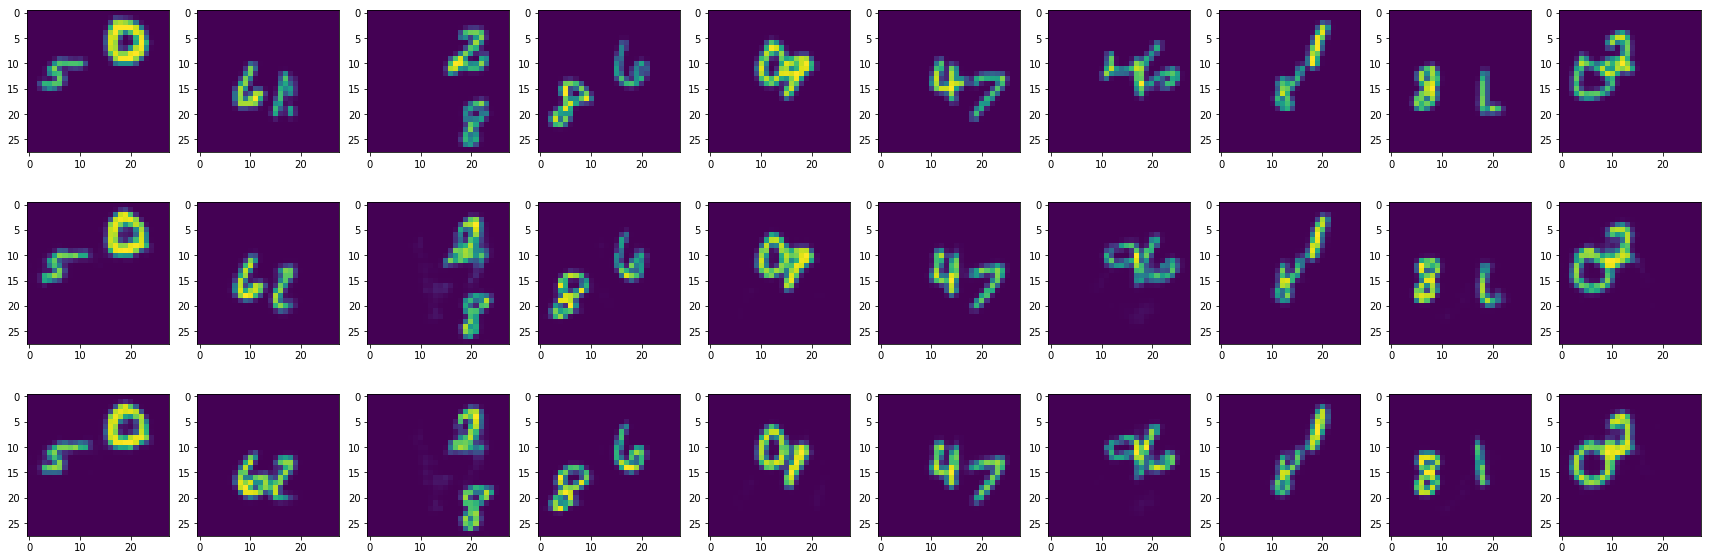

In [43]:
fig = plt.figure(figsize=(30, 10))
lstack = pnetbfgs + z_d
gt = [test_data[rand_imgs[i], rand_seq[i], :, :] for i in range(num_images)]
for i, img in enumerate(gt):
    fig.add_subplot(3, len(gt), i+1)
    plt.imshow(img)
    
for i, vec in enumerate(lstack):
    
    fig.add_subplot(3, len(pnetbfgs), (i+len(gt))+1)
    img = netG(torch.tensor(vec)).detach().numpy().squeeze()
    plt.imshow(img)
plt.show()

In [45]:
base_path = '/Users/michaelgentnermac/Documents/ADL4CV/results/d_correction/'
folder_name = 'poster1'
create_folder(os.path.join(base_path, folder_name))
for i in range(num_images):
    

    #save original image
    path = os.path.join(base_path, folder_name, 'original')
    create_folder(path)
    img = torch.tensor(gt[i])
    toPil(img.squeeze().float()).save(os.path.join(path, str(i)+'.png'), 'PNG')
    
    #save pnet+bfgs image
    print("PNET&BFGS: Projecting image {}".format(i))
    path = os.path.join(base_path, folder_name, 'pnet_bfgs')
    create_folder(path)
    pbfgs_img = netG(pnetbfgs[i])
    toPil(pbfgs_img.detach().squeeze().float()).save(os.path.join(path, str(i)+'.png'), 'PNG')
    
    #save pnet+bfgs image
    print("D-Correction: Projecting image {}".format(i))
    path = os.path.join(base_path, folder_name, 'd_corr')
    create_folder(path)
    pbfgs_img = netG(z_d[i])
    toPil(pbfgs_img.detach().squeeze().float()).save(os.path.join(path, str(i)+'.png'), 'PNG')
    

PNET&BFGS: Projecting image 0
D-Correction: Projecting image 0
PNET&BFGS: Projecting image 1
D-Correction: Projecting image 1
PNET&BFGS: Projecting image 2
D-Correction: Projecting image 2
PNET&BFGS: Projecting image 3
D-Correction: Projecting image 3
PNET&BFGS: Projecting image 4
D-Correction: Projecting image 4
PNET&BFGS: Projecting image 5
D-Correction: Projecting image 5
PNET&BFGS: Projecting image 6
D-Correction: Projecting image 6
PNET&BFGS: Projecting image 7
D-Correction: Projecting image 7
PNET&BFGS: Projecting image 8
D-Correction: Projecting image 8
PNET&BFGS: Projecting image 9
D-Correction: Projecting image 9
